# Fake news Detection

### Importing Modules

In [1]:
import pandas as pd #for importing dataset
import numpy as np #for doing mathematical operations 
import seaborn as sns
from sklearn.model_selection import train_test_split #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
from sklearn.metrics import accuracy_score
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

### Reading two  data files 
### Download this dataset from
https://www.kaggle.com/code/therealsampat/fake-news-detection/data

In [2]:
data_true=pd.read_csv("True.csv")
data_fake=pd.read_csv("Fake.csv")

#### Printing top 5 values from both Dataset 

In [3]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Adding column name "class" in both datasets

In [5]:
data_fake["class"]=0
data_true["class"]=1

In [6]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

###  Taking last 10 values for manual testing from both Datasets 

In [7]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset
    
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [8]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\91981\AppData\Local\Temp/ipykernel_12148/1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\91981\AppData\Local\Temp/ipykernel_12148/1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [10]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Merging main two datasets

In [12]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### Performing some basic data visualizations

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


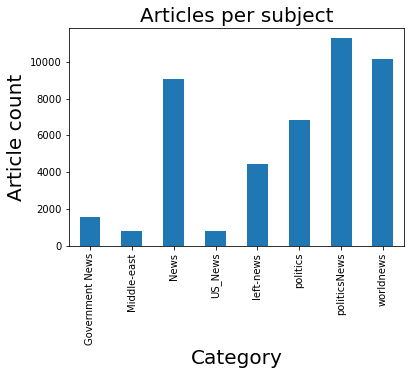

In [14]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

### Removing 3 columns from dataset 

In [15]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset 

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Shuffling the dataset for better prediction

In [16]:
data=data.sample(frac=1)
data.head(10)

,text,class
12818,Reckless Hillary couldn t have cared less abou...,0
8712,"Once again, the comedic geniuses at Saturday N...",0
710,After GOP Rep. Steve Scalise was shot during a...,0
17519,WASHINGTON President Trump said on Thursday ...,0
6578,Donald Trump can barely go a day without sayin...,0
7158,NEW YORK (Reuters) - U.S. President-elect Dona...,1
17664,WASHINGTON (Reuters) - Facebook Inc (FB.O) Chi...,1
16242,MADRID/CARACAS (Reuters) - Spanish authorities...,1
12901,,0
13481,This is a great flashback of all those who cla...,0


### Checking for null values in dataset

In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Creating data filtering function to remove unwanted data from text

In [18]:
def filtering(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

### Filtering data of our text column using above function

In [19]:
data["text"]= data["text"].apply(filtering)

### Creating Dependant and independant variables 

In [20]:
x = data['text']
y = data['class']

### Spliting dataset for training and testing purpose 

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Vectorizing the text
#### The sklearn. feature_extraction module is used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorization = TfidfVectorizer() # creating object 
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix. 
#IDF returns numerical statics that how the word is important to the document
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

## Classifaction using various classifers

### Logictic Regression
#### Calculating probability of event occurence 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set

LogisticRegression()

In [26]:
LR.score(xv_test,y_test) # method computes the accuracy score

0.9864527629233512

In [27]:
pred_LR= LR.predict(xv_test) # Predict using the linear model

In [28]:
print(classification_report(y_test,pred_LR)) #creating classification report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5757
           1       0.99      0.99      0.99      5463

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree Classification 

#### Non-parametric supervised learning method used for both classification and regression tasks.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [31]:
pred_DT = DT.predict(xv_test)

In [32]:
DT.score(xv_test,y_test)

0.9959893048128342

In [33]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5757
           1       1.00      1.00      1.00      5463

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Gradient Boosting Classifier

#### It is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [36]:
GBC.score(xv_test,y_test)

0.9949197860962566

In [37]:
pred_GBC = GBC.predict(xv_test)

In [38]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5757
           1       0.99      1.00      0.99      5463

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Random Forest Classifier

#### Supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
RFC.score(xv_test,y_test)

0.9901960784313726

In [42]:
pred_RFC = RFC.predict(xv_test)

In [43]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5757
           1       0.99      0.99      0.99      5463

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Manual Testing

In [44]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]))) 
     

In [45]:
news = str(input())
manual_testing(news)

The Internet Brutally Mocks Disney’s 


LR Prediction: FAKE News 
DT Prediction: FAKE News 
GBC Prediction: FAKE News 
RFC Prediction: FAKE News


In [46]:
news = str(input())
manual_testing(news)

This Sarah Huckabee Sanders Tweet About Attacking The FBI Hasn’t Aged Well,"Donald J. Trump spent a portion of his Sunday, presumably after church, lashing out at the worl


LR Prediction: FAKE News 
DT Prediction: FAKE News 
GBC Prediction: FAKE News 
RFC Prediction: FAKE News
